
Comparison of Improved Tangent, Heun, and Optimal Methods (h = 0.1):
  t   Imp y  Imp Err  Heun y  Heun Err   Opt y  Opt Err  Exact y
0.0 1.00000  0.00000 1.00000   0.00000 1.00000  0.00000  1.00000
0.1 1.11975  0.11268 1.11950   0.11293 1.11967  0.11276  1.23243
0.2 1.28152  0.25870 1.28100   0.25923 1.28135  0.25887  1.54022
0.3 1.48763  0.45349 1.48680   0.45432 1.48736  0.45376  1.94112
0.4 1.74064  0.71517 1.73947   0.71633 1.74025  0.71556  2.45580
0.5 2.04335  1.06499 2.04181   1.06653 2.04284  1.06551  3.10834
0.6 2.39890  1.52784 2.39695   1.52979 2.39825  1.52849  3.92674
0.7 2.81074  2.13276 2.80833   2.13517 2.80994  2.13356  4.94350
0.8 3.28267  2.91363 3.27976   2.91654 3.28170  2.91460  6.19629
0.9 3.81890  3.90987 3.81543   3.91334 3.81774  3.91103  7.72877
1.0 4.42408  5.16733 4.42000   5.17141 4.42272  5.16869  9.59141

Comparison of Improved Tangent, Heun, and Optimal Methods (h = 0.05):
   t   Imp y  Imp Err  Heun y  Heun Err   Opt y  Opt Err  Exact y
0.00 1.00000 

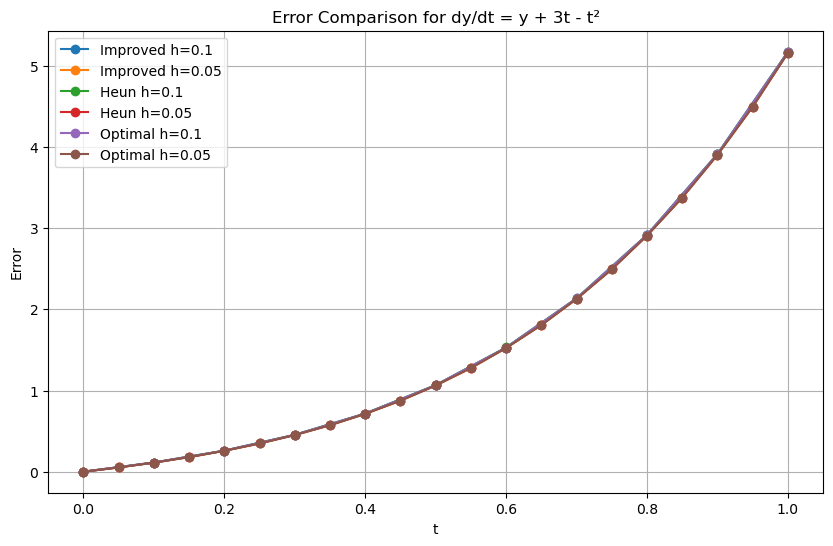

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def y_exact(t):
    return (t**2 + 2*t + 2) * np.exp(t) - t**2 - 2*t - 1

def f(t, y):
    return y + 3*t - t**2

def improved_tangent(h):
    t_vals = np.arange(0, 1 + h, h)
    y = 1
    results = []
    for t in t_vals:
        y_exact_val = y_exact(t)
        error = abs(y - y_exact_val)
        results.append([t, y, error, y_exact_val])
        k1 = f(t, y)
        k2 = f(t + h/2, y + h/2 * k1)
        y += h * k2
    return results

def heun(h):
    t_vals = np.arange(0, 1 + h, h)
    y = 1
    results = []
    for t in t_vals:
        y_exact_val = y_exact(t)
        error = abs(y - y_exact_val)
        results.append([t, y, error, y_exact_val])
        k1 = f(t, y)
        k2 = f(t + h, y + h * k1)
        y += h / 2 * (k1 + k2)
    return results

def optimal(h):
    alpha = 2/3
    t_vals = np.arange(0, 1 + h, h)
    y = 1
    results = []
    for t in t_vals:
        y_exact_val = y_exact(t)
        error = abs(y - y_exact_val)
        results.append([t, y, error, y_exact_val])
        k1 = f(t, y)
        k2 = f(t + alpha * h, y + alpha * h * k1)
        y += h * ((1 - 1/(2*alpha)) * k1 + (1/(2*alpha)) * k2)
    return results

h1, h2 = 0.1, 0.05
imp_01 = improved_tangent(h1)
heu_01 = heun(h1)
opt_01 = optimal(h1)

imp_005 = improved_tangent(h2)
heu_005 = heun(h2)
opt_005 = optimal(h2)

def combine_table(imp, heu, opt):
    combined = []
    for i in range(len(imp)):
        t = imp[i][0]
        row = [
            t,
            round(imp[i][1], 5), round(imp[i][2], 5),
            round(heu[i][1], 5), round(heu[i][2], 5),
            round(opt[i][1], 5), round(opt[i][2], 5),
            round(imp[i][3], 5)
        ]
        combined.append(row)
    return pd.DataFrame(combined, columns=[
        "t",
        "Imp y", "Imp Err",
        "Heun y", "Heun Err",
        "Opt y", "Opt Err",
        "Exact y"
    ])

df_01 = combine_table(imp_01, heu_01, opt_01)
df_005 = combine_table(imp_005, heu_005, opt_005)

print("\nComparison of Improved Tangent, Heun, and Optimal Methods (h = 0.1):")
print(df_01.to_string(index=False))

print("\nComparison of Improved Tangent, Heun, and Optimal Methods (h = 0.05):")
print(df_005.to_string(index=False))

results = {
    "Improved h=0.1": (df_01["t"], df_01["Imp y"], df_01["Imp Err"]),
    "Improved h=0.05": (df_005["t"], df_005["Imp y"], df_005["Imp Err"]),
    "Heun h=0.1": (df_01["t"], df_01["Heun y"], df_01["Heun Err"]),
    "Heun h=0.05": (df_005["t"], df_005["Heun y"], df_005["Heun Err"]),
    "Optimal h=0.1": (df_01["t"], df_01["Opt y"], df_01["Opt Err"]),
    "Optimal h=0.05": (df_005["t"], df_005["Opt y"], df_005["Opt Err"])
}
plt.figure(figsize=(10, 6))
for label, (t_vals, y_vals, errors) in results.items():
    plt.plot(t_vals, errors, marker='o', label=label)
plt.xlabel('t')
plt.ylabel('Error')
plt.title('Error Comparison for dy/dt = y + 3t - t²')
plt.legend()
plt.grid(True)
plt.show()


 RK2 Results for h = 0.01
   x  RK2 y (h=0.01)              Exact y                    Error
2.00        3.000000                [3.0]                    [0.0]
2.01        3.020151  [3.020151504715706]  [1.004715705743564e-06]
2.02        3.040609  [3.040611044531899] [1.9413038936377802e-06]
2.03        3.061384  [3.061387007424175] [2.8143713679540383e-06]
2.04        3.082484 [3.0824883261832348]  [3.906390789509828e-06]
2.05        3.103919 [3.1039235831311793] [4.8734617998924534e-06]
2.06        3.125696  [3.125702127272265]  [5.853183633330872e-06]
2.07        3.147827 [3.1478336846250015]  [7.065373841097511e-06]
2.08        3.170320  [3.170327762758087]  [8.206642872377046e-06]
2.09        3.193185  [3.193194683162321]  [9.472443387004148e-06]
2.10        3.216434 [3.2164449562334827] [1.0921355494630802e-05]
2.11        3.240077  [3.240101662775383] [2.4845502786252638e-05]
2.12        3.264125  [3.264184617076189] [5.9922137325418845e-05]
2.13        3.288589 [3.28869997815

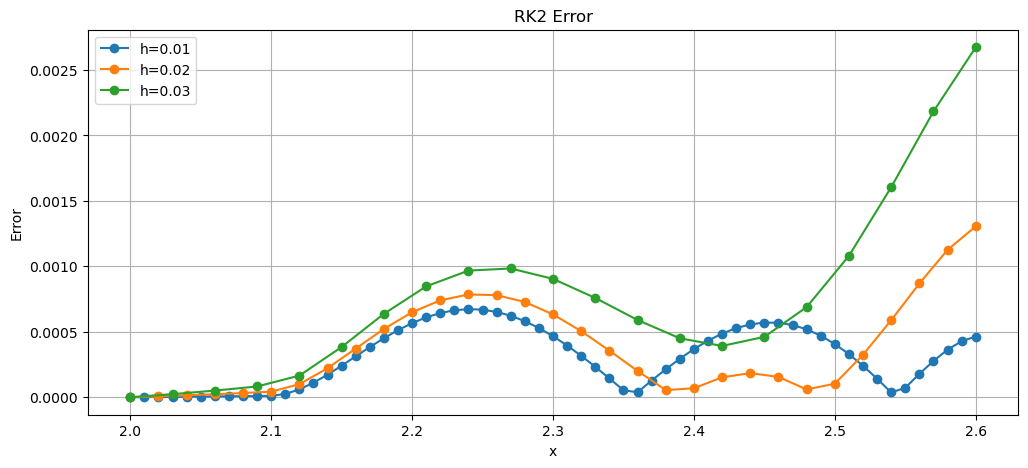

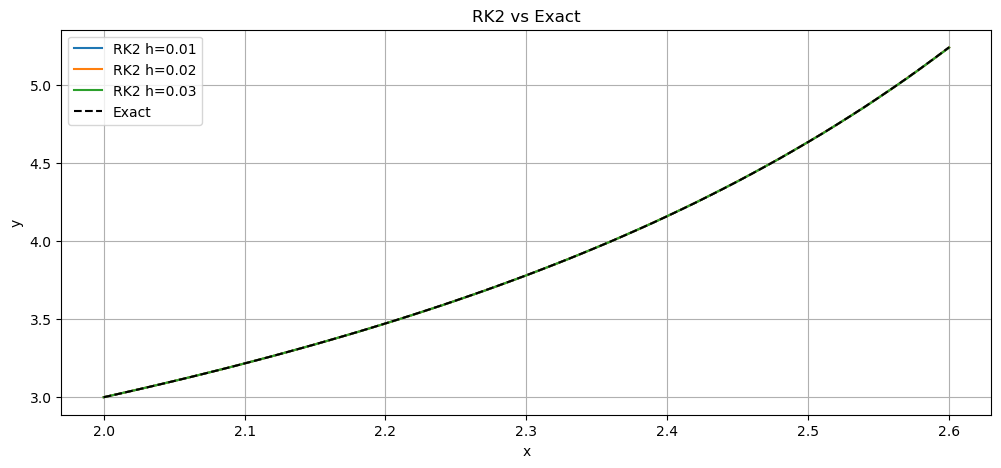

In [3]:
# 4
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f(x, y): return x * (y - x)
def exact(x): 
    sol = solve_ivp(f, [2, 2.6], [3], t_eval=np.linspace(2, 2.6, 1000))
    from scipy.interpolate import interp1d
    interp_func = interp1d(sol.t, sol.y[0])
    x_valid = np.clip(x, 2, 2.6)
    return interp_func(x_valid)

def rk2(h):
    x = np.arange(2, 2.6 + h/2, h)  
    y = 3; out = []
    for xi in x:
        y_ex = exact([xi])  
        err = abs(y - y_ex)
        out.append([xi, y, y_ex, err])
        k1 = f(xi, y); k2 = f(xi + h, y + h * k1)
        y += h / 2 * (k1 + k2)
    return pd.DataFrame(out, columns=["x", f"RK2 y (h={h})", "Exact y", "Error"])

def plot_rk2(dfs, hs):
    plt.figure(figsize=(12, 5))
    for df, h in zip(dfs, hs): plt.plot(df["x"], df["Error"], label=f"h={h}", marker='o')
    plt.title("RK2 Error"); plt.xlabel("x"); plt.ylabel("Error"); plt.legend(); plt.grid()
    plt.figure(figsize=(12, 5))
    for df, h in zip(dfs, hs): plt.plot(df["x"], df[f"RK2 y (h={h})"], label=f"RK2 h={h}")
    plt.plot(dfs[0]["x"], dfs[0]["Exact y"], label="Exact", color='black', linestyle='--')
    plt.title("RK2 vs Exact"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.grid(); plt.show()

if __name__ == "__main__":
    h_values = [0.01, 0.02, 0.03]
    dfs = [rk2(h) for h in h_values]

    for df, h in zip(dfs, h_values):
        print(f"\n RK2 Results for h = {h}")
        print(df.to_string(index=False))
        print("-" * 80) 
    plot_rk2(dfs, h_values) 


In [1]:
# 5
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt

def y_exact(x):
    return x**2 - x - 5 + 6 * np.exp(x)

def f(x, y):
    return y + 3*x - x**2

def euler(h):
    x_vals = np.arange(0, 1 + h, h)
    y = 1  
    results = []
    for x in x_vals:
        y_exact_val = y_exact(x)
        error = abs(y - y_exact_val)
        results.append([x, y, error, y_exact_val])
        y += h * f(x, y) 
    return results

def backward_euler(h):
    x_vals = np.arange(0, 1 + h, h)
    y = 1  
    results = []
    for x in x_vals:
        y_exact_val = y_exact(x)
        error = abs(y - y_exact_val)
        results.append([y, error])
        x_next = x + h
        y = (y + h * (3 * x_next - x_next**2)) / (1 - h)
    return results

def modified_euler(h):
    x_vals = np.arange(0, 1 + h, h)
    y = 1  
    results = []
    for x in x_vals:
        y_exact_val = y_exact(x)
        error = abs(y - y_exact_val)
        results.append([y, error])
        y_predict = y + h * f(x, y)
        y += h / 2 * (f(x, y) + f(x + h, y_predict))
    return results
    
h1, h2 = 0.1, 0.05

euler_01 = euler(h1)
backward_01 = backward_euler(h1)
modified_01 = modified_euler(h1)

euler_005 = euler(h2)
backward_005 = backward_euler(h2)
modified_005 = modified_euler(h2)

combined_01 = []
for i in range(len(euler_01)):
    x = euler_01[i][0]
    row = [
        x,
        round(euler_01[i][1], 4), round(euler_01[i][2], 4),
        round(backward_01[i][0], 4), round(backward_01[i][1], 4),
        round(modified_01[i][0], 4), round(modified_01[i][1], 4),
        round(euler_01[i][3], 4)]
    combined_01.append(row)
    
combined_005 = []
for i in range(len(euler_005)):
    x = euler_005[i][0]
    row = [
        x,
        round(euler_005[i][1], 4), round(euler_005[i][2], 4),
        round(backward_005[i][0], 4), round(backward_005[i][1], 4),
        round(modified_005[i][0], 4), round(modified_005[i][1], 4),
        round(euler_005[i][3], 4)]
    combined_005.append(row)
columns = [
    "x",
    "Euler y", "Euler Error",
    "Backward y", "Backward Error",
    "Modified y", "Modified Error",
    "Exact y"]

df_01 = pd.DataFrame(combined_01, columns=columns)
df_005 = pd.DataFrame(combined_005, columns=columns)

print("\nComparison of Euler, Backward Euler, and Modified Euler (h = 0.1):")
print(df_01.to_string(index=False))
print("\nComparison of Euler, Backward Euler, and Modified Euler (h = 0.05):")
print(df_005.to_string(index=False))


Comparison of Euler, Backward Euler, and Modified Euler (h = 0.1):
  x  Euler y  Euler Error  Backward y  Backward Error  Modified y  Modified Error  Exact y
0.0   1.0000       0.0000      1.0000          0.0000      1.0000          0.0000   1.0000
0.1   1.1000       0.4410      1.1433          0.3977      1.1195          0.4215   1.5410
0.2   1.2390       0.9294      1.3326          0.8358      1.2810          0.8874   2.1684
0.3   1.4189       1.4703      1.5707          1.3185      1.4868          1.4024   2.8892
0.4   1.6418       2.0692      1.8607          1.8502      1.7395          1.9715   3.7109
0.5   1.9100       2.7324      2.2064          2.4360      2.0418          2.6005   4.6423
0.6   2.2260       3.4667      2.6115          3.0812      2.3970          3.2958   5.6927
0.7   2.5926       4.2800      3.0806          3.7919      2.8083          4.0642   6.8725
0.8   3.0128       5.1804      3.6184          4.5748      3.2798          4.9135   8.1932
0.9   3.4901       6.1